<a href="https://colab.research.google.com/github/JeremiasSchultz/Analise_dados_Yno/blob/main/Analise_dados_Yno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ler arquivo colab
from google.colab import files
uploaded = files.upload()

Saving dados.csv to dados.csv


In [63]:
#define data frame
df = pd.read_csv('dados.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
#manipula DF

df['DateTime'] = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(df.DateTime,format='%d/%m/%Y %H:%M:%S')

In [65]:
#define colunas necessárias
df1 = df[['DateTime','Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [66]:
#condição para linhas diferentes

verifica_linhas = df1[(df1['Sub_metering_1'] == '?') | (df1['Sub_metering_2'] == '?')| (df1['Sub_metering_3'] == '?')].index
df2 = df1.drop(verifica_linhas)

In [67]:
# tranformando em numérico
df2[['Sub_metering_1','Sub_metering_2','Sub_metering_3']] = df2[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].apply(pd.to_numeric)

In [68]:
#conta linhas
clinhs = df2[df2.columns[0]].count()
print(clinhs)

2049280


In [69]:
#consumo médio
sub1 = np.ndarray(shape=(24,),dtype=float)
sub2 = np.ndarray(shape=(24,),dtype=float)
sub3 = np.ndarray(shape=(24,),dtype=float)
subt = np.ndarray(shape=(24,),dtype=float)

for h in range(24):
    hora = str(h)
    df2.index = pd.to_datetime(df2['DateTime'])
    df3 = df2.between_time(hora+':00:00',hora+':59:59')
    sub1[h] = df3['Sub_metering_1'].sum()
    sub2[h] = df3['Sub_metering_2'].sum()
    sub3[h] = df3['Sub_metering_3'].sum()

    subt[h]= sub1[h]+sub2[h]+sub3[h]

print('Consumos médio')

mediasub1 = df2['Sub_metering_1'].mean()
print('Consumo medio sub_meterinf_1: {:.2f}'.format(mediasub1))

mediasub2 = df2['Sub_metering_2'].mean()
print('Consumo medio sub_meterinf_2: {:.2f}'.format(mediasub2))

mediasub3 = df2['Sub_metering_3'].mean()
print('Consumo medio sub_meterinf_3: {:.2f}'.format(mediasub3))

Consumos médio
Consumo medio sub_meterinf_1: 1.12
Consumo medio sub_meterinf_2: 1.30
Consumo medio sub_meterinf_3: 6.46


In [70]:
print('Consumos máximo')

maxSub1=df2['Sub_metering_1'].max()
print('Consumo max Sub_meteting_1:',maxSub1)

maxSub2=df2['Sub_metering_2'].max()
print('Consumo max Sub_meteting_2:',maxSub2)

maxSub3=df2['Sub_metering_3'].max()
print('Consumo max Sub_meteting_3:',maxSub3)

Consumos máximo
Consumo max Sub_meteting_1: 88.0
Consumo max Sub_meteting_2: 80.0
Consumo max Sub_meteting_3: 31.0


Text(0.5, 1.0, 'Sub-meter 3')

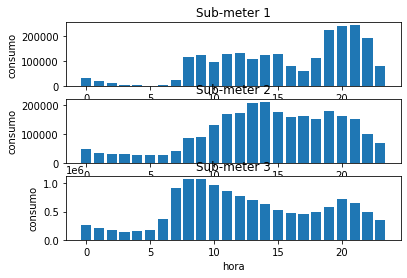

In [71]:
#O gráfico do consumo de cada um dos sensores separadamente
h = np.arange(24)

plt.subplot(3,1,1)

plt.bar(h,sub1)
plt.xlabel('hora')
plt.ylabel('consumo')
plt.title('Sub-meter 1')

plt.subplot(3,1,2)


plt.bar(h,sub2)
plt.xlabel('hora')
plt.ylabel('consumo')
plt.title('Sub-meter 2')

plt.subplot(3,1,3)

plt.bar(h,sub3)
plt.xlabel('hora')
plt.ylabel('consumo')
plt.title('Sub-meter 3')




Text(0.5, 1.0, 'Sub-meter total')

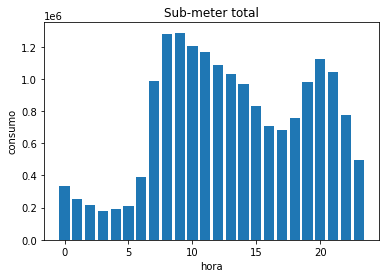

In [72]:
plt.bar(h,subt)
plt.xlabel('hora')
plt.ylabel('consumo')
plt.title('Sub-meter total')


In [73]:

plt.show()